<a href="https://colab.research.google.com/github/Madhumad36/index.html/blob/main/PlantDiseaseDetection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'plantdisease' dataset.
Path to dataset files: /kaggle/input/plantdisease
[INFO] Loading images ...
Processing plant folder: PlantVillage
[INFO] Processing Pepper__bell___Bacterial_spot ...
Processing disease folder: Pepper__bell___Bacterial_spot
Processing image: /kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/0f72db9c-d635-4415-9781-68937328aed2___NREC_B.Spot 9188.JPG
Processing image: /kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/1b8d3e98-43d9-441d-93ef-a359e6e9ddc2___NREC_B.Spot 9052.JPG
Processing image: /kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/b6d35d21-4812-4e32-ab9a-b6ddda8cbb79___JR_B.Spot 8972.JPG
Processing image: /kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/e4e7e5a2-5aa1-4378-833d-9142358c7c9b___JR_B.Spot 9092.JPG
Processing image: /kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/8b50f2db-cbf2-4758-bea6-a011f0cc14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] training network...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 350s 9s/step - accuracy: 0.2847 - loss: 2.8523 - val_accuracy: 0.0933 - val_loss: 9.1798
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 380s 9s/step - accuracy: 0.5250 - loss: 1.5828 - val_accuracy: 0.0933 - val_loss: 8.3673
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 399s 11s/step - accuracy: 0.5809 - loss: 1.4489 - val_accuracy: 0.0933 - val_loss: 14.6956
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 351s 9s/step - accuracy: 0.6273 - loss: 1.3290 - val_accuracy: 0.0800 - val_loss: 25.5950
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 330s 9s/step - accuracy: 0.6438 - loss: 1.2206 - val_accuracy: 0.0800 - val_loss: 14.9673
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 404s 11s/step - accuracy: 0.7022 - loss: 0.9248 - val_accuracy: 0.0800 - val_loss: 17.0274
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 388s 10s/step - accuracy: 0.6720 - loss: 1.0262 - val_accuracy: 0.1400 - val_loss: 14.1285
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 393s 10s/step - accuracy: 0.6847 - loss: 1.0565 - val_accuracy: 0

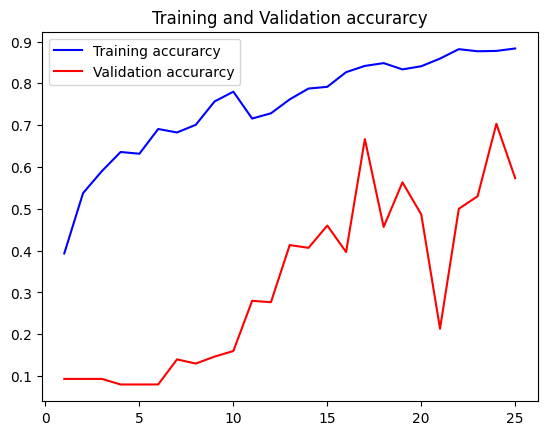

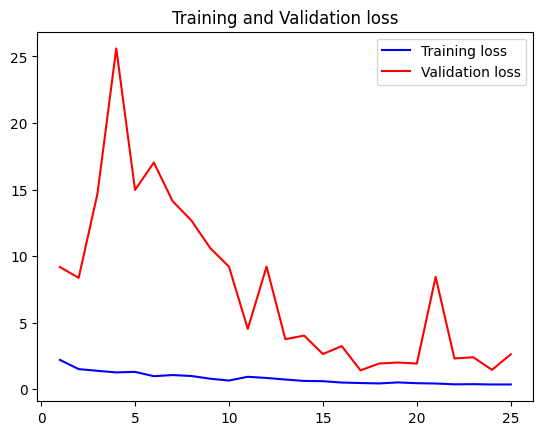

[INFO] Calculating model accuracy
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4734 - loss: 3.0399
Test Accuracy: 50.333333015441895
[INFO] Saving model...


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)


import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow

EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = path # Use the downloaded path instead of the hardcoded one
width=256
height=256
depth=3

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    # remove .DS_Store from list
    if ".DS_Store" in root_dir :
        root_dir.remove(".DS_Store")

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        print(f"Processing plant folder: {plant_folder}") # Debug print

        # remove .DS_Store from list
        if ".DS_Store" in plant_disease_folder_list :
            plant_disease_folder_list.remove(".DS_Store")

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...") # Debug print
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
            print(f"Processing disease folder: {plant_disease_folder}") # Debug print

            # remove .DS_Store from list
            if ".DS_Store" in plant_disease_image_list :
                plant_disease_image_list.remove(".DS_Store")

            for image in plant_disease_image_list[:100]: # Reduced the number of images loaded
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                print(f"Processing image: {image_directory}") # Debug print
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

image_size = len(image_list)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print(label_binarizer.classes_)

np_image_list = np.array(image_list, dtype=np.float16) / 225.0

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

opt = Adam(learning_rate=INIT_LR)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

train_generator = aug.flow(x_train, y_train, batch_size=BS)
validation_generator = aug.flow(x_test, y_test, batch_size=BS)


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS, verbose=1
    )

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

# save the model to disk
print("[INFO] Saving model...")
pickle.dump(model,open('cnn_model.pkl', 'wb'))

In [3]:
import pickle

# Load the saved model
with open('cnn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the saved label binarizer
with open('label_transform.pkl', 'rb') as f:
    loaded_label_binarizer = pickle.load(f)

print("Model and label binarizer loaded successfully.")

Model and label binarizer loaded successfully.


In [12]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Define the default image size used during training
default_image_size = tuple((256, 256))

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.resize(image, default_image_size)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = image.astype('float16') / 225.0  # Normalize the image data
        return image
    else:
        return None

# Replace 'path/to/your/sample/image.JPG' with the actual path to your image
sample_image_path = '/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/0f72db9c-d635-4415-9781-68937328aed2___NREC_B.Spot 9188.JPG' # Replace with your image path
preprocessed_image = preprocess_image(sample_image_path)

if preprocessed_image is not None:
    print("Sample image loaded and preprocessed successfully.")
else:
    print("Error loading sample image.")

Sample image loaded and preprocessed successfully.


In [13]:
# Make a prediction
predictions = loaded_model.predict(preprocessed_image)

print("Prediction made successfully.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Prediction made successfully.


In [14]:
# Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class_label = loaded_label_binarizer.classes_[predicted_class_index]

print(f"The predicted disease is: {predicted_class_label}")

The predicted disease is: Pepper__bell___Bacterial_spot
